## Predicting Prescriber induced Overdose

**Author : Kiros Gebremariam**

Cohorts of the Data Science Immersive, General Assembly @ Washington DC campus

#  Modeling and feature importance visual

## Feature Selection

In this section, I will select specific features for model training. The original dataset contains 265 features, most of which are categorical attributes, dominantly the list of drug names that are approved as pain medications that need special AED licensed prescriber.Here,my main target is to predict the overdoses using the  the list of prescriber specialists with NPI information and the FDA approved drug lists. The data set has only total opiod cliams and total claim counts and i took the standard prescription for opiod drugs is 84 days which is 12 weeks. Therefore, an additional feature was created in the data cleaning, pre processing that shows avg_op_supply which i limit to the standard to be 84 and any ones who prescribes the category of medications under the controlled substance act(CSA). The CSA is used for organizing drugs based on the risk of abuse or harm to users in five and my capestone focuses on the approved by [FDA](https://www.fda.gov/drugs/drugsafety/informationbydrugclass/ucm251735.htm) and [DEA](https://www.deadiversion.usdoj.gov/schedules/) to be prescribed by licensed and certified health professional.  These drug lists that are considered controlled substances under the Controlled Substances Act (CSA) are divided into five schedules.  An updated and complete list of the schedules is published annually in [Title 21 Code of Federal Regulations (C.F.R.) §§ 1308.11 through 1308.15](https://www.deadiversion.usdoj.gov/21cfr/cfr/2108cfrt.htm).

Therfore, for analysis and visualization  i only took those physicians who have greater opood cliams from the center for medical services dataset and created a feature average opiod supply  by dividing the total cliam by the opiod cliam and reviewed those specialists who prescribe more than the set limit of 12 weeks and that also become a new feature that measures the length of opiod prescription supply more than 84 days. As been visualized in notebook 1.3, significant amount of prescribers are family physicians, followed by internal medicine,nurse practitioners, Physicain Assistant and physical medicine and rehabilitation. When i group based on speciality and the vsuals can be accessed   [here top 20](https://plot.ly/~kiros/112) and the lists are as follows:-
  > $'Cardiology', 'Nephrology', 'Endocrinology', 'Neurology'  'General Practice', 'Internal Medicine', 'Urology'$,   > $'Pulmonary Disease', 'Gastroenterology', 'Family Practice', 'Infectious Disease','Psychiatry'$ 
  >$'Nurse Practitioner', 'Ophthalmology','Allergy/Immunology', 'Otolaryngology', 'Psychiatry & Neurology'$ , $'Rheumatology', 'Dermatology', 'Obstetrics/Gynecology'$

In [1]:
# Import Libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

#Importing Machine learning libraries
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,ExtraTreesClassifier, BaggingRegressor, RandomForestRegressor,  AdaBoostClassifier, AdaBoostRegressor
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression, LinearRegression
# importing NN and Keras library
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn import metrics
from sklearn import svm
np.random.seed(2018)
# Configure visual settings:
plt.style.use('fivethirtyeight')
sns.set(font_scale=2)
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Using TensorFlow backend.


In [2]:
prescriber_df = pd.read_csv('./inputs/prescribers_clean832.csv')

In [3]:
prescriber_df.shape

(24237, 355)

In [4]:
prescriber_df.head()

,Unnamed: 0,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,...,State_TX,State_UT,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY,State_ZZ
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,134,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,43,0,0,0,21,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#prescriber_df = pd.get_dummies(prescriber_df, columns=['Credentials', 'Specialty','State', 'Abbrev'], drop_first=True)

### Setting up for Classification 

In [6]:
# Setting up for train test split

X = prescriber_df.drop(['Opioid.Prescriber'], axis = 1).values.astype(float)
y = prescriber_df['Opioid.Prescriber'].values

In [7]:
# train and test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Logistic Regression 

# Set up pipeline 
ss = StandardScaler()
logreg = LogisticRegression()
pipes = Pipeline([('ss', ss), ('logreg', logreg)])

# Fit pipeline 
pipes.fit(X_train, y_train)
print(pipes.score(X_test, y_test))
print(pipes.score(X_train, y_train))

0.9268426842684269
0.9257294429708223


In [9]:
# KNN 

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test)) 
print(knn.score(X_train, y_train))

0.7376237623762376
0.832124963159446


In [10]:
# Decision Tree 
decisiontree = DecisionTreeClassifier()
model = decisiontree.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.903052805280528
1.0


In [11]:
# Bagged Decision
bagging = BaggingClassifier()
bagging.fit(X_train, y_train)
print(bagging.score(X_test, y_test))
print(bagging.score(X_train, y_train))

0.9276677667766776
0.9908045977011494


In [12]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))
print(rf.score(X_train, y_train))

0.9253300330033003
0.9930445033893309


In [13]:
# Adaboost

abr = AdaBoostClassifier()
abr.fit(X_train, y_train)
print(abr.score(X_test, y_test))
print(abr.score(X_train, y_train))

# This model is overfitting, I think 

0.9335808580858086
0.928676687297377


### EVALUATING MODELS 


In [14]:
# Define f1-score function
def f1(model, X, y):
    y_pred = model.predict(X)
    f1 = metrics.f1_score(y, y_pred) 
    return f1

In [15]:
# Logistic Regression Evaluation

f1(pipes, X_test, y_test), f1(pipes, X_train, y_train)

(0.935919055649241, 0.9340106839844978)

In [16]:
# KNN Evaluation 

f1(knn, X_test, y_test), f1(knn, X_train, y_train)

(0.7611417125688533, 0.848025613660619)

In [17]:
# Decision Tree Evaluation
f1(decisiontree, X_test, y_test), f1(decisiontree, X_train, y_train)

(0.9181279758448495, 1.0)

In [18]:
# Random Forest Evaluation 

f1(rf, X_test, y_test), f1(rf, X_train, y_train)

(0.9354416835096897, 0.9940584088620343)

In [19]:
# ADA Evaluation

f1(abr, X_test, y_test), f1(abr, X_train, y_train)

(0.9418142392482833, 0.9366691091803622)

### Creating/Evaluating Model with Cross Validation 

In [20]:
# Encoding class values as integers 
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

In [21]:
def create_baseline():  # defining a function, which as my baseline
    # Build model 
    model = Sequential()    #first layer defines the shape of the input which is X_train.shape:354
    model.add(Dense(60, input_dim = 354, kernel_initializer= 'normal', activation = 'relu'))
    ##then add a layer defining the activation function - relu is on of the most popular
    #activation - should the neuron be fired or not - relu is quite efficient.
    #A dense layer is a classic fully connected neural network layer(60) : each input node is connected to each output node.
    
    model.add(Dense(1, kernel_initializer = 'normal', activation = 'sigmoid'))
    #for this layer use the sigmoid activation function
    #sigmoid will assign a propability to each tag (total output = 1) since its a classification problem
    # Compile Model 
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    # optimizer is the function used to search for the right weights
    #here we are using Adaptive Moment Estimation (Adam) that also uses adaptive learning rates
    #The loss function, also called the objective function is the evaluation of the model used by the optimizer 
    # to navigate the weight space; only accuracy is supported at the moment for metrics.
    return model

In [22]:
# Evaluating model after standardizing the standardized dataset 
# early_stop = EarlyStopping(monitor='val_loss', min_delta=0) 
# callbacks=[early_stop])
estimator = KerasClassifier(build_fn = create_baseline, nb_epoch = 100, batch_size = 5, verbose = 1)
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
results = cross_val_score(estimator, X, encoded_y, cv = kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/1
2425/2425 [==============================] - 0s 178us/step
Epoch 1/1
2424/2424 [==============================] - 0s 187us/step
Epoch 1/1
2424/2424 [==============================] - 0s 194us/step
Epoch 1/1
2424/2424 [==============================] - 0s 187us/step
Epoch 1/1
2424/2424 [==============================] - 1s 360us/step
Epoch 1/1
2424/2424 [==============================] - 1s 245us/step
Epoch 1/1
2423/2423 [==============================] - 1s 277us/step
Epoch 1/1
2423/2423 [==============================] - 1s 399us/step
Epoch 1/1
2423/2423 [==============================] - 1s 277us/step
Epoch 1/1
2423/2423 [==============================] - 1s 321us/step
Results: 69.53% (11.49%)


In [23]:
#Evaluatig  baseline Neural network model with standardized dataset 
# if you have patience to wait  35-45 minutes then re-run this, it needs ver very longer time to process.
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs = 20, batch_size = 5, verbose = 2)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
results = cross_val_score(pipeline, X, y, cv = kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/20
 - 11s - loss: 0.3706 - acc: 0.8286
Epoch 2/20
 - 10s - loss: 0.2939 - acc: 0.8691
Epoch 3/20
 - 11s - loss: 0.2575 - acc: 0.8882
Epoch 4/20
 - 12s - loss: 0.2324 - acc: 0.9007
Epoch 5/20
 - 12s - loss: 0.2151 - acc: 0.9101
Epoch 6/20
 - 12s - loss: 0.2017 - acc: 0.9167
Epoch 7/20
 - 12s - loss: 0.1897 - acc: 0.9209
Epoch 8/20
 - 11s - loss: 0.1796 - acc: 0.9244
Epoch 9/20
 - 10s - loss: 0.1726 - acc: 0.9301
Epoch 10/20
 - 10s - loss: 0.1636 - acc: 0.9344
Epoch 11/20
 - 10s - loss: 0.1635 - acc: 0.9354
Epoch 12/20
 - 11s - loss: 0.1532 - acc: 0.9404
Epoch 13/20
 - 11s - loss: 0.1479 - acc: 0.9413
Epoch 14/20
 - 11s - loss: 0.1418 - acc: 0.9450
Epoch 15/20
 - 11s - loss: 0.1398 - acc: 0.9442
Epoch 16/20
 - 11s - loss: 0.1349 - acc: 0.9459
Epoch 17/20
 - 11s - loss: 0.1289 - acc: 0.9482
Epoch 18/20
 - 11s - loss: 0.1276 - acc: 0.9501
Epoch 19/20
 - 11s - loss: 0.1215 - acc: 0.9524
Epoch 20/20
 - 12s - loss: 0.1211 - acc: 0.9531
Epoch 1/20
 - 13s - loss: 0.3702 - acc: 0.8290
Ep

 - 9s - loss: 0.1451 - acc: 0.9426
Epoch 15/20
 - 10s - loss: 0.1378 - acc: 0.9442
Epoch 16/20
 - 10s - loss: 0.1345 - acc: 0.9470
Epoch 17/20
 - 9s - loss: 0.1312 - acc: 0.9472
Epoch 18/20
 - 10s - loss: 0.1278 - acc: 0.9492
Epoch 19/20
 - 10s - loss: 0.1266 - acc: 0.9505
Epoch 20/20
 - 10s - loss: 0.1209 - acc: 0.9533
Epoch 1/20
 - 11s - loss: 0.3728 - acc: 0.8276
Epoch 2/20
 - 10s - loss: 0.2941 - acc: 0.8686
Epoch 3/20
 - 10s - loss: 0.2585 - acc: 0.8864
Epoch 4/20
 - 10s - loss: 0.2359 - acc: 0.8984
Epoch 5/20
 - 10s - loss: 0.2182 - acc: 0.9090
Epoch 6/20
 - 10s - loss: 0.2042 - acc: 0.9151
Epoch 7/20
 - 10s - loss: 0.1944 - acc: 0.9203
Epoch 8/20
 - 10s - loss: 0.1826 - acc: 0.9261
Epoch 9/20
 - 10s - loss: 0.1758 - acc: 0.9303
Epoch 10/20
 - 10s - loss: 0.1708 - acc: 0.9321
Epoch 11/20
 - 10s - loss: 0.1631 - acc: 0.9355
Epoch 12/20
 - 10s - loss: 0.1556 - acc: 0.9375
Epoch 13/20
 - 10s - loss: 0.1493 - acc: 0.9396
Epoch 14/20
 - 10s - loss: 0.1438 - acc: 0.9427
Epoch 15/20
 - 

In [24]:
print("On cross validation model gives accuracy of: %.2f%% with a std of (%.2f%%)" % (results.mean()*100, results.std()*100))

On cross validation model gives accuracy of: 88.77% with a std of (1.02%)


## Conclusive Models 

In [25]:
def create_baseline():  # defining a function, which as my baseline
    # Build model 
    model = Sequential()    #first layer defines the shape of the input which is X_train.shape:354
    model.add(Dense(60, input_dim = 354, kernel_initializer= 'normal', activation = 'relu'))
    ##then add a layer defining the activation function - relu is on of the most popular
    #activation - should the neuron be fired or not - relu is quite efficient.
    #A dense layer is a classic fully connected neural network layer(60) : each input node is connected to each output node.
    
    model.add(Dense(1, kernel_initializer = 'normal', activation = 'sigmoid'))
    #for this layer use the sigmoid activation function
    #sigmoid will assign a propability to each tag (total output = 1) since its a classification problem
    # Compile Model 
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    # optimizer is the function used to search for the right weights
    #here we are using Adaptive Moment Estimation (Adam) that also uses adaptive learning rates
    #The loss function, also called the objective function is the evaluation of the model used by the optimizer 
    # to navigate the weight space; only accuracy is supported at the moment for metrics.
    return model

In [26]:
model = Sequential()    #first layer defines the shape of the input which is X_train.shape:354
##then add a layer defining the activation function - relu is on of the most popular
#activation - should the neuron be fired or not - relu is quite efficient.
#A dense layer is a classic fully connected neural network layer(60) : each input node is connected to each output node.
    
model.add(Dense(60, input_dim = 354, kernel_initializer = 'normal', activation = 'relu'))
#for this layer use the sigmoid activation function
#sigmoid will assign a propability to each tag (total output = 1) since its a classification problem
model.add(Dense(1, kernel_initializer = 'normal', activation = 'sigmoid'))

# Compiling Model 

earlystop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 2, verbose = 0, mode = 'auto')
callbacks_list = [earlystop]
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# optimizer is the function used to search for the right weights
#here we are using Adaptive Moment Estimation (Adam) that also uses adaptive learning rates
 #The loss function, also called the objective function is the evaluation of the model used by the optimizer 
# to navigate the weight space; only accuracy is supported at the moment for metrics.

In [27]:
history = model.fit(X, y, validation_split = 0.1, epochs = 20, batch_size = 5, verbose = 2, callbacks = callbacks_list)

Train on 21813 samples, validate on 2424 samples
Epoch 1/20
 - 11s - loss: 4.0963 - acc: 0.6854 - val_loss: 6.4082 - val_acc: 0.5957
Epoch 2/20
 - 11s - loss: 2.2342 - acc: 0.7976 - val_loss: 1.3709 - val_acc: 0.8317
Epoch 3/20
 - 11s - loss: 0.5032 - acc: 0.8770 - val_loss: 0.3846 - val_acc: 0.7240
Epoch 4/20
 - 11s - loss: 0.2883 - acc: 0.8963 - val_loss: 0.3006 - val_acc: 0.8894
Epoch 5/20
 - 11s - loss: 0.2634 - acc: 0.9008 - val_loss: 0.2714 - val_acc: 0.8944
Epoch 6/20
 - 11s - loss: 0.2453 - acc: 0.9070 - val_loss: 0.2389 - val_acc: 0.9097
Epoch 7/20
 - 11s - loss: 0.2342 - acc: 0.9116 - val_loss: 0.3404 - val_acc: 0.7574
Epoch 8/20
 - 11s - loss: 0.2333 - acc: 0.9144 - val_loss: 0.2147 - val_acc: 0.9175
Epoch 9/20
 - 11s - loss: 0.2293 - acc: 0.9165 - val_loss: 0.2273 - val_acc: 0.9130
Epoch 10/20
 - 11s - loss: 0.2305 - acc: 0.9168 - val_loss: 0.2919 - val_acc: 0.8833


In [28]:
loss, accuracy = model.evaluate(X, y)

24237/24237 [==============================] - 1s 38us/step


In [29]:
accuracy

0.9148409456665103

In [30]:
loss

0.23092762610008993

### Standardize variables or  Features of the dataset 

In [31]:
min_max_scaler = preprocessing.MinMaxScaler()
x_minmax = min_max_scaler.fit_transform(X)
X_test_minmax = min_max_scaler.transform(X_test)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [32]:
history = model.fit(X_scaled, y, validation_split = 0.25, epochs = 20, batch_size = 5, verbose = 2, callbacks = callbacks_list)

Train on 18177 samples, validate on 6060 samples
Epoch 1/20
 - 10s - loss: 0.3745 - acc: 0.8300 - val_loss: 0.3668 - val_acc: 0.8252
Epoch 2/20
 - 10s - loss: 0.3045 - acc: 0.8633 - val_loss: 0.3197 - val_acc: 0.8655
Epoch 3/20
 - 10s - loss: 0.2674 - acc: 0.8833 - val_loss: 0.3026 - val_acc: 0.8762
Epoch 4/20
 - 10s - loss: 0.2380 - acc: 0.8968 - val_loss: 0.3037 - val_acc: 0.8746
Epoch 5/20
 - 10s - loss: 0.2163 - acc: 0.9093 - val_loss: 0.3061 - val_acc: 0.8805


In [33]:
loss, accuracy = model.evaluate(X_scaled, y)

24237/24237 [==============================] - 1s 40us/step


In [34]:
accuracy

0.914057020260742

In [35]:
loss

0.21761873970682405

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


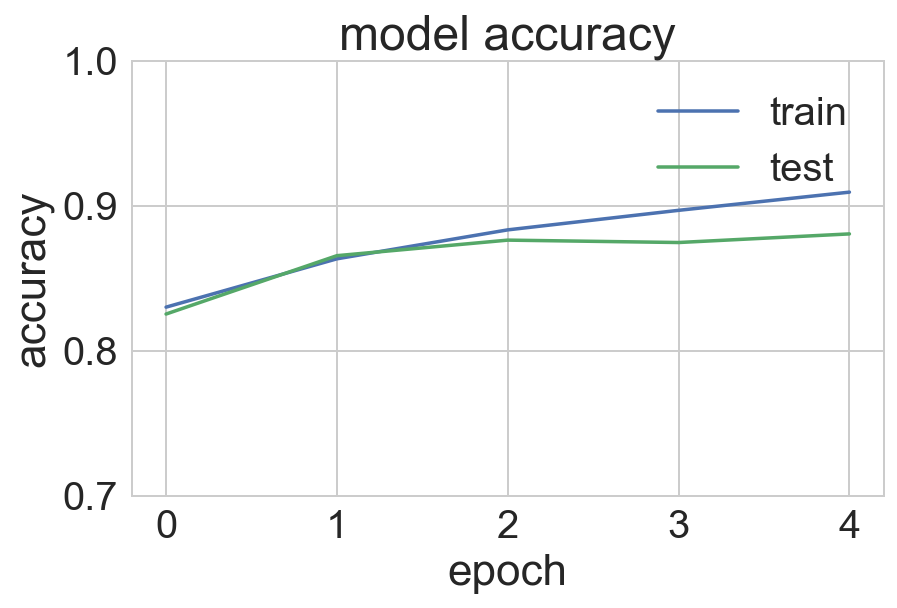

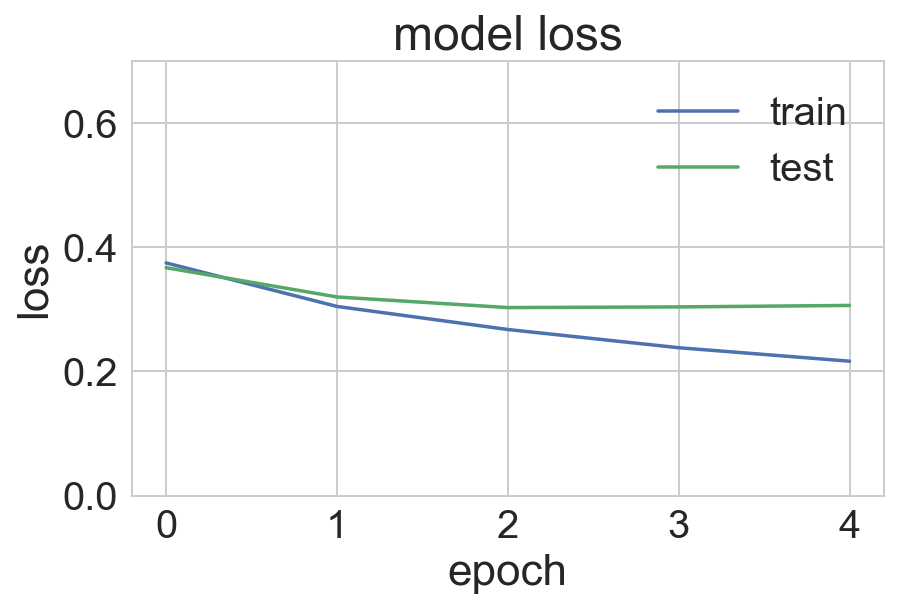

In [36]:
# formula adapted from Justin Lecture notes and python machin learning packtbooks online
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.7,1)
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,0.7)
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [37]:
from keras import regularizers
import numpy as np
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
np.random.seed(2018)

model= Sequential()
n_input = X_train.shape[1]
n_hidden = n_input
n_output = 1
#first layer defines the shape of the input which is X_train.shape
#then add a layer defining the activation function - relu is on of the most popular
#activation - should the neuron be fired or not - relu is quite efficient.
model.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
#A dense layer is a classic fully connected neural network layer : each input node is connected to each output node.
#for this layer use the sigmoid activation function
#sigmoid will assign a propability to each tag (total output = 1) since its a classification problem
model.add(Dense(n_output, activation='sigmoid'))

#now we compile the model
#optimizer is the function used to search for the right weights
#here we are using Adaptive Moment Estimation (Adam) that also uses adaptive learning rates
#The loss function, also called the objective function is the evaluation of the model used by the optimizer 
# to navigate the weight space; only accuracy is supported at the moment for metrics.

earlystop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 2, verbose = 0, mode = 'auto')
callbacks_list = [earlystop]
model.compile(loss='binary_crossentropy', optimizer='adam', 
                metrics=['acc'])

#early_stop = EarlyStopping(monitor='val_loss', min_delta=0) 

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                      epochs=30, batch_size= 5,verbose =2,callbacks = callbacks_list)

Train on 16965 samples, validate on 7272 samples
Epoch 1/30
 - 16s - loss: 6.5879 - acc: 0.5861 - val_loss: 6.5024 - val_acc: 0.5921
Epoch 2/30
 - 14s - loss: 6.6163 - acc: 0.5849 - val_loss: 6.4980 - val_acc: 0.5923
Epoch 3/30
 - 14s - loss: 6.5284 - acc: 0.5905 - val_loss: 6.4801 - val_acc: 0.5935
Epoch 4/30
 - 14s - loss: 7.9655 - acc: 0.5038 - val_loss: 8.8759 - val_acc: 0.4491
Epoch 5/30
 - 14s - loss: 7.7084 - acc: 0.5195 - val_loss: 6.4774 - val_acc: 0.5935
Epoch 6/30
 - 14s - loss: 6.5002 - acc: 0.5922 - val_loss: 6.4747 - val_acc: 0.5938
Epoch 7/30
 - 14s - loss: 8.3948 - acc: 0.4785 - val_loss: 9.0143 - val_acc: 0.4405
Epoch 8/30
 - 14s - loss: 7.0827 - acc: 0.5576 - val_loss: 8.0303 - val_acc: 0.5017


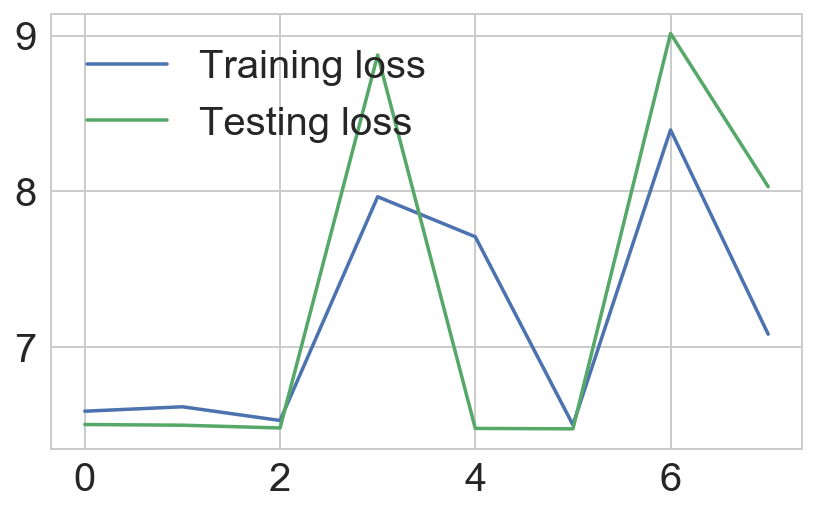

In [38]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(test_loss, label='Testing loss')
plt.legend()

In [39]:
history.history['acc'][-1], history.history['val_acc'][-1]

(0.5576186388941806, 0.5016501766718654)

In [40]:
loss, accuracy = model.evaluate(X_scaled, y)

24237/24237 [==============================] - 1s 52us/step


In [41]:
accuracy

0.5752362091054753

In [42]:
loss

6.493203932712607

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


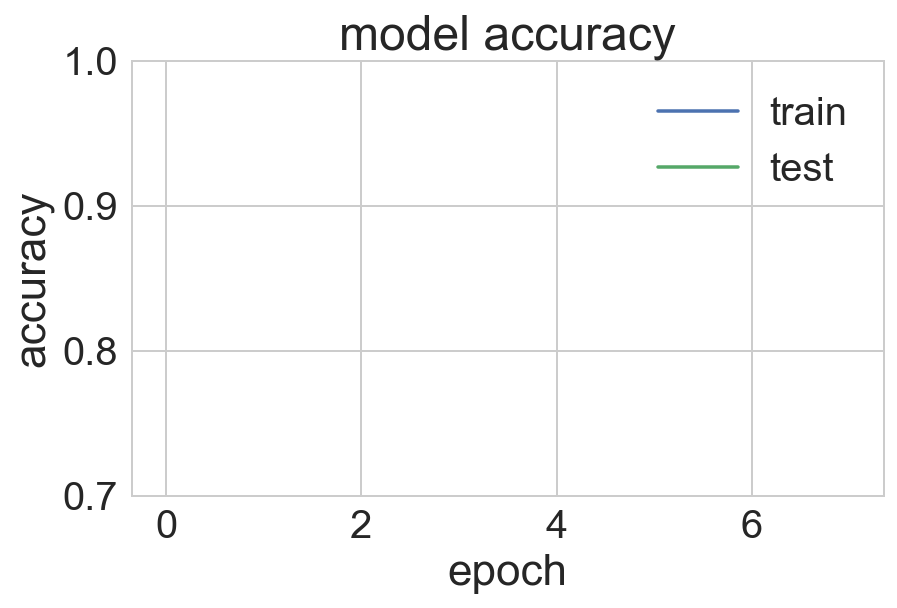

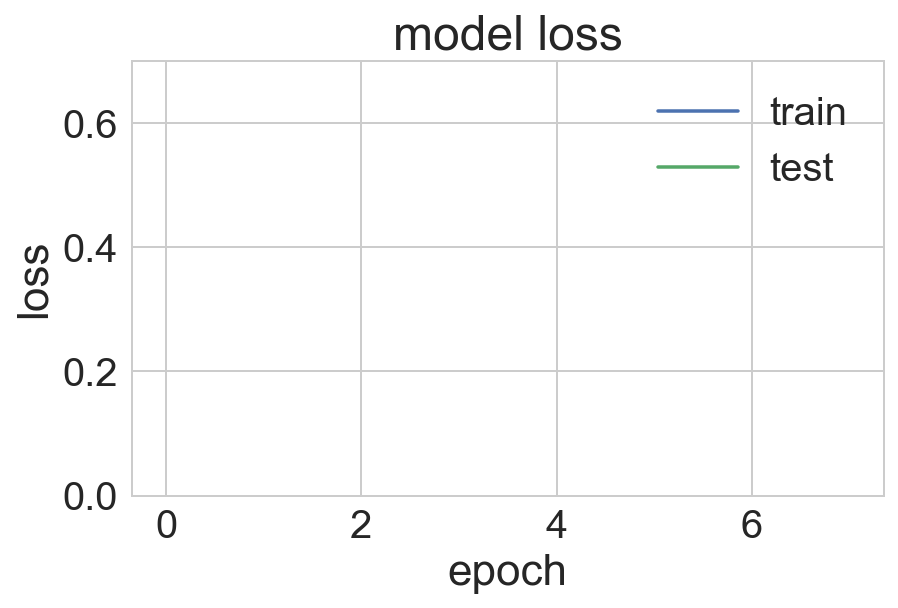

In [43]:
# formula adapted from Justin Lecture notes and python machin learning packtbooks online
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.7,1)
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,0.7)
plt.legend(['train', 'test'], loc='upper right')
plt.show()